In [108]:
import pandas as pd
import altair as alt
from altair import datum

In [35]:
data = pd.read_csv('GLB.Ts+dSST.csv')

In [653]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [37]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [154]:
average_year = data.melt(id_vars='Year', value_vars=months).groupby("Year").mean()

In [155]:
average_year.head()

,value
Year,
1880,-0.185833
1881,-0.095000
1882,-0.104167
1883,-0.189167
1884,-0.289167


In [415]:
line_data = average_year.loc[1880:1899]

In [416]:
left_aligned_text = alt.Chart(average_year.reset_index()).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    dx = 5
).encode(x=alt.X('Year', scale=alt.Scale(zero=False)), y='value', text='Year')\
.transform_filter((datum.Year == 1944) | (datum.Year == 2014) |(datum.Year == 2017))

In [417]:
right_aligned_text = alt.Chart(average_year.reset_index()).mark_text(
    align='right',
    baseline='middle',
    fontSize = 12,
    dx = -5
).encode(x=alt.X('Year', scale=alt.Scale(zero=False)), y='value', text='Year')\
.transform_filter((datum.Year == 1904) | (datum.Year == 1998))

In [418]:
y2015 = alt.Chart(average_year.reset_index()).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    dy = 5,
    dx = 5
).encode(x=alt.X('Year', scale=alt.Scale(zero=False)), y='value', text='Year')\
.transform_filter((datum.Year == 2015))

In [419]:
y2016 = alt.Chart(average_year.reset_index()).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    dx = 5,
    fontWeight='bold'
).encode(x=alt.X('Year', scale=alt.Scale(zero=False)), y='value', text='Year')\
.transform_filter((datum.Year == 2016))

In [533]:
mean_line = alt.Chart(line_data.reset_index()).mark_rule(color='black', size=0.5).encode(y='mean(value)') 

In [559]:
points = alt.Chart(average_year.reset_index(), width=700)\
.mark_point(size=35, opacity=1, 
            fill='darkorange', filled=True,
            stroke='black', strokeWidth=1,
            strokeOpacity=0.5)\
.encode(x=alt.X('Year', scale=alt.Scale(zero=False), axis=alt.Axis(format="d", title="")),
        y=alt.Y('value', axis=alt.Axis(format="+S", title="")))

In [560]:
text = alt.Chart(pd.DataFrame({
    'x': [2001.70, 2000.80, 2012],
    'y': [-0.08, -0.14, -0.32],
    'text': ['HOTTER THAN THE', '1890-1899 AVERAGE', 'COLDER']
})).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = -10
).encode(x='x', y='y', text='text')

In [561]:
title = alt.Chart(pd.DataFrame({
    'x': [1885, 1885],
    'y': [0.8, 0.73],
    'text': ['Annual Global Surface Temperature,', 'Relative to Late 19th Century Average']
})).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    fontWeight='bold',
    dx = -10
).encode(x='x', y='y', text='text')

In [697]:
horizontal_grid = alt.Chart(pd.DataFrame({
    'value': [-0.005 - 0.4]
})).mark_rule(color='black', size=0.2).encode(y="mean(value)") +\
alt.Chart(pd.DataFrame({
    'value': [-0.006 + 0.2]
})).mark_rule(color='black', size=0.2).encode(y="mean(value)") +\
alt.Chart(pd.DataFrame({
    'value': [-0.005 + 0.4]
})).mark_rule(color='black', size=0.2).encode(y="mean(value)") +\
alt.Chart(pd.DataFrame({
    'value': [-0.003 + 0.8]
})).mark_rule(color='black', size=0.2).encode(y="mean(value)") 

    

In [719]:
vertical_grid = alt.Chart(pd.DataFrame({
    'value': [1890]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)") +\
alt.Chart(pd.DataFrame({
    'value': [1900]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [1920]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [1930]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [1950]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [1960]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [1980]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [1990]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")+\
alt.Chart(pd.DataFrame({
    'value': [2010]
})).mark_rule(color='black', size=0.05).encode(x="mean(value)")

In [725]:
plot = mean_line + left_aligned_text + right_aligned_text +\
        y2015 + y2016 + text + title + points

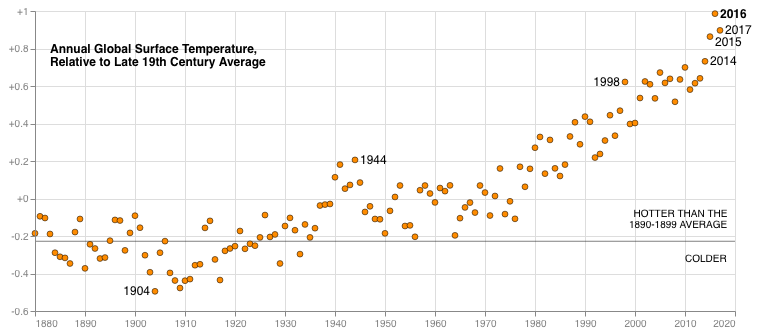

In [726]:
plot.configure_axis(grid=True, labelColor='grey').display(renderer='svg')